In [1]:
import pathlib

path=str(pathlib.Path().resolve().parent)+"/Imagenes"

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

def resize(img,div,div2):
    x = img.shape[0]//div
    y = img.shape[1]//div2
    return cv.resize(img,(x,y))

pi = cv.imread((path+"/Piedra.jpg"))
pa = cv.imread((path+"/Papel.jpg"))
ti = cv.imread((path+"/Tijera.jpg"))
pi = pi[:,:,0]
pa = pa[:,:,0]
ti = ti[:,:,0]

#pi = cv.transpose(resize(pi,8,4))
#pa = resize(pa,4,8)
#ti = resize(ti,4,8)
pi = cv.transpose(pi)

#pi=(cv.cvtColor(pi,cv.COLOR_BGR2GRAY))
#pa=(cv.cvtColor(pa,cv.COLOR_BGR2GRAY))
#ti=(cv.cvtColor(ti,cv.COLOR_BGR2GRAY))


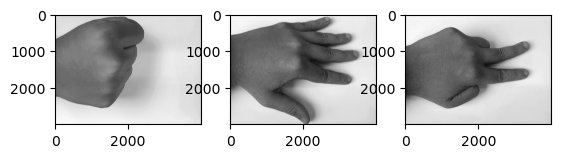

In [3]:
from matplotlib import pyplot as plt
import numpy as np


fig,axs = plt.subplots(1,3)


axs[0].imshow(pi,cmap="gray")
axs[1].imshow(pa,cmap="gray")
axs[2].imshow(ti,cmap="gray")

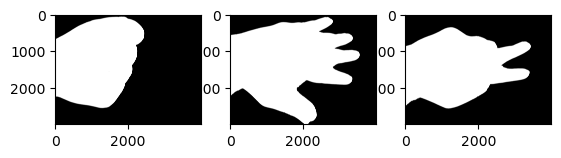

In [4]:
ret,th1 = cv.threshold(pi,137, 255,cv.THRESH_BINARY_INV)
ret,th2 = cv.threshold(pa,157, 255,cv.THRESH_BINARY_INV)
ret,th3 = cv.threshold(ti,147, 255,cv.THRESH_BINARY_INV)

fig,axs = plt.subplots(1,3)
axs[0].imshow(th1,cmap="gray")
axs[1].imshow(th2,cmap="gray")
axs[2].imshow(th3,cmap="gray")

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))


imgPi = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=1)
imgPi = cv.morphologyEx(imgPi, cv.MORPH_OPEN, kernel, iterations=1)

imgPa = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel, iterations=1)
imgPa = cv.morphologyEx(imgPa, cv.MORPH_OPEN, kernel, iterations=1)

imgTi = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=1)
imgTi = cv.morphologyEx(imgTi, cv.MORPH_OPEN, kernel, iterations=1)

In [12]:

contornosPi,hPi=cv.findContours(imgPi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contornosPa,hPa=cv.findContours(imgPa, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contornosTi,hTi=cv.findContours(imgTi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

Centro: X:1137 Y:1274


4654208.0

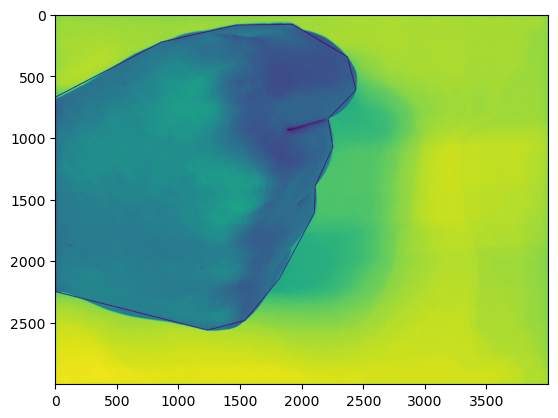

In [13]:


ax = plt.subplot()


def dibuja_contorno(axs,contornos,img,frame=None):
    approx=[]
    area=[]
    for contorno in contornos:
        M = cv.moments(contorno)
        if M['m00']:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            print(f"Centro: X:{cx} Y:{cy}")
            # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
            perimetro = cv.arcLength(contorno,True)
            approx.append(cv.approxPolyDP(contorno,0.005*perimetro,True))
            area.append(cv.contourArea(contorno))
            hull = cv.convexHull(contorno)
    cv.drawContours(img,approx,-1,(0,255,0),5)
    if axs!=None:
        axs.imshow(img)
    if frame!=None:
        cv.namedWindow("Frame")
        cv.imshow("Frame", frame)
    return sum(area),hull

areaPi,hullPi=dibuja_contorno(ax,contornosPi,pi.copy())
areaPi

Centro: X:1594 Y:1361


6329699.0

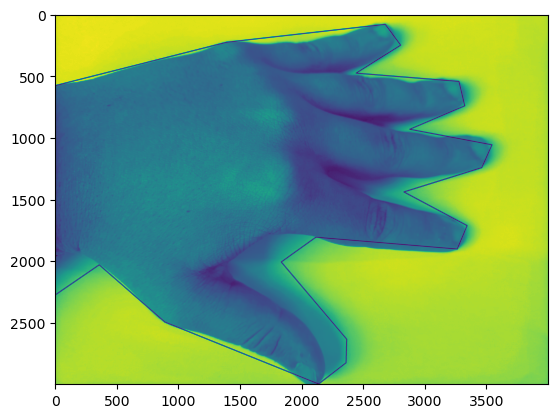

In [9]:
ax2 = plt.subplot()
areaPa,hullPa=dibuja_contorno(ax2,contornosPa,pa.copy())

areaPa

Centro: X:1440 Y:1459
Centro: X:147 Y:7


array([[[422,   0]],

       [[422,   1]],

       [[421,   2]],

       [[419,   3]],

       [[  5,  24]],

       [[  0,  24]],

       [[  0,   0]]], dtype=int32)

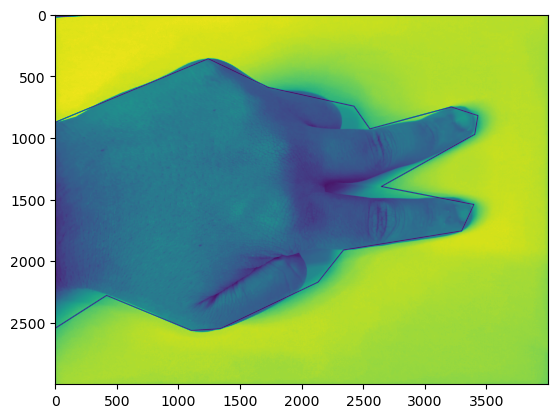

In [10]:
ax = plt.subplot()
areaTi,hullTi=dibuja_contorno(ax,contornosTi,ti.copy())

hullTi

In [11]:
video = cv.VideoCapture(0)

while(True):
    ret, frame = video.read()
    if ret == True:
        frame = cv.flip(frame, 1)
        cv.imshow("Salida", frame)
        frame2=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret,frame2 = cv.threshold(frame2,157, 255,cv.THRESH_BINARY_INV)
        cv.namedWindow("Frame2")
        cv.imshow("Frame2", frame2)
        frame2 = cv.morphologyEx(frame2, cv.MORPH_CLOSE, kernel, iterations=2)
        frame2 = cv.morphologyEx(frame2, cv.MORPH_OPEN, kernel, iterations=0)
        cv.namedWindow("Frame3")
        cv.imshow("Frame3", frame2)
        contornos,h = cv.findContours(frame2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        approx=[]
        for contorno in contornos:
               M = cv.moments(contorno)
               if M['m00']:
                   cx = int(M['m10']/M['m00'])
                   cy = int(M['m01']/M['m00'])
                   #print(f"Centro: X:{cx} Y:{cy}")
                   # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
                   perimetro = cv.arcLength(contorno,True)
                   approx.append(cv.approxPolyDP(contorno,0.005*perimetro,True))
                   area = cv.contourArea(contorno)
        cv.drawContours(frame,approx,-1,(0,255,0),5)
        cv.namedWindow("Frame")
        cv.imshow("Frame", frame)
    if cv.waitKey(10) & 0xFF == 27: break

video.release()
cv.destroyAllWindows()